# Import required libraries and import dataset as well

In [224]:
#import necessary libraries and read the dataset
import pandas as pd
import numpy as np

dataset = pd.read_csv("pulsar_stars.csv")

In [225]:
dataset.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Exploratory Data Analysis

In [226]:
#find length of dataset
len(dataset)

17898

In [227]:
#find shape of dataset
dataset.shape

(17898, 9)

So we have 9 features and 17898 instances

In [228]:
#names of all the columns
col_names = dataset.columns
col_names

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

We can see that there are spaces in most of the columns and we need to remove them 

In [229]:
#lets remove that space

dataset_cols = dataset.columns.str.strip()
dataset_cols 

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       'Excess_kurtosis_of_the_DM_SNR_curve', 'Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

Now the space is gone and all columns seems to be very clean

In [230]:
#As we can see that column names are very large and I need to make them short

dataset.columns = ['IP_Mean', 'IP_SD', 'EK_IP', 'Skewness_IP', 'Mean_DMSNR', 'SD_DMSNR', 'EK_DMSNR', 'Skewness_DMSNR', 'Target_Class']
dataset.columns

Index(['IP_Mean', 'IP_SD', 'EK_IP', 'Skewness_IP', 'Mean_DMSNR', 'SD_DMSNR',
       'EK_DMSNR', 'Skewness_DMSNR', 'Target_Class'],
      dtype='object')

Now we can see our cols are very short and it looks cool

In [231]:
dataset.head()

,IP_Mean,IP_SD,EK_IP,Skewness_IP,Mean_DMSNR,SD_DMSNR,EK_DMSNR,Skewness_DMSNR,Target_Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


we can see whole dataset clearly now

In [232]:
#lets now count number of 0 and 1 in our target variable

dataset['Target_Class'].value_counts()

0    16259
1     1639
Name: Target_Class, dtype: int64

we can see that there are 16259 zeros and 1639 ones

In [233]:
#lets use unique function of numpy to find the unique values in the target variables
np.unique(dataset["Target_Class"])

array([0, 1])

(array([16259.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1639.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

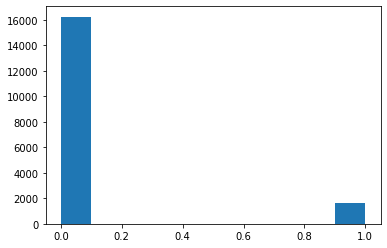

In [234]:
#now lets visualize zeros and ones in a graph as visualization is always pretty and clear
import matplotlib.pyplot as plt
plt.hist(dataset['Target_Class'])

This visualization is done using matplotlib library

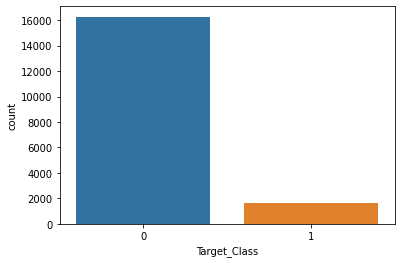

0    16259
1     1639
Name: Target_Class, dtype: int64


In [235]:
#now visualize using seaborn library
import seaborn as sb
sb.countplot(x = 'Target_Class', data = dataset)
plt.show()
print(dataset['Target_Class'].value_counts())

In [236]:
#find percentage of counts manually
per_counts = (dataset['Target_Class'].value_counts())/(len(dataset))

per_counts

0    0.908426
1    0.091574
Name: Target_Class, dtype: float64

In [237]:
#convert into percentage
percentage = per_counts * 100
percentage

0    90.842552
1     9.157448
Name: Target_Class, dtype: float64

So we have almost 91% zeros and 9% ones

In [238]:
#now find info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IP_Mean         17898 non-null  float64
 1   IP_SD           17898 non-null  float64
 2   EK_IP           17898 non-null  float64
 3   Skewness_IP     17898 non-null  float64
 4   Mean_DMSNR      17898 non-null  float64
 5   SD_DMSNR        17898 non-null  float64
 6   EK_DMSNR        17898 non-null  float64
 7   Skewness_DMSNR  17898 non-null  float64
 8   Target_Class    17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [239]:
#as we can see there are no null values, still we want to see are there any null values
dataset.isnull().sum()

IP_Mean           0
IP_SD             0
EK_IP             0
Skewness_IP       0
Mean_DMSNR        0
SD_DMSNR          0
EK_DMSNR          0
Skewness_DMSNR    0
Target_Class      0
dtype: int64

since we do not have any null values and we can see that there are 8 continuous variables and 1 is discrete

In [240]:
#viewing summary statistics in numerical variables

round(dataset.describe(), 3)

,IP_Mean,IP_SD,EK_IP,Skewness_IP,Mean_DMSNR,SD_DMSNR,EK_DMSNR,Skewness_DMSNR,Target_Class
count,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000
mean,111.080,46.550,0.478,1.770,12.614,26.327,8.304,104.858,0.092
std,25.653,6.843,1.064,6.168,29.473,19.471,4.506,106.515,0.288
min,5.812,24.772,-1.876,-1.792,0.213,7.370,-3.139,-1.977,0.000
25%,100.930,42.376,0.027,-0.189,1.923,14.437,5.782,34.961,0.000
50%,115.078,46.947,0.223,0.199,2.802,18.461,8.434,83.065,0.000
75%,127.086,51.023,0.473,0.928,5.464,28.428,10.703,139.309,0.000
max,192.617,98.779,8.070,68.102,223.392,110.642,34.540,1191.001,1.000


Text(0, 0.5, 'Skewness_DMSNR')

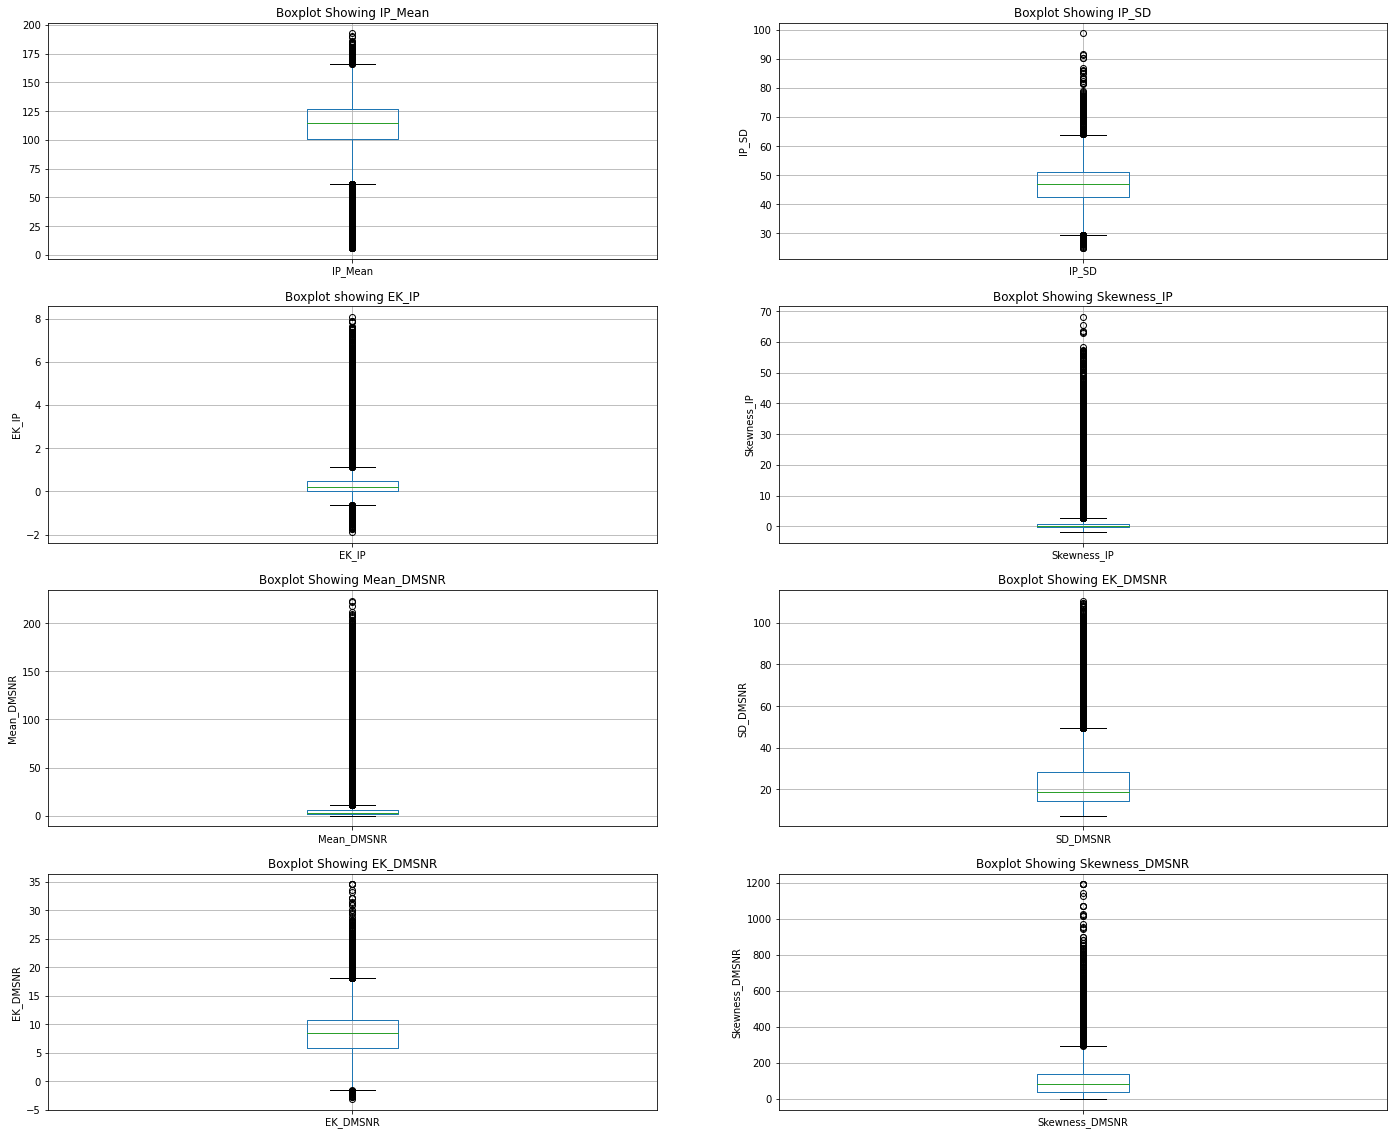

In [241]:
#Now lets plot boxplots to visualize any outliers

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = dataset.boxplot(column='IP_Mean')
fig.set_title('Boxplot Showing IP_Mean')
#fig.set_ylabel('IP_Mean')

plt.subplot(4, 2, 2)
fig = dataset.boxplot(column='IP_SD')
fig.set_title('Boxplot Showing IP_SD')
fig.set_ylabel('IP_SD')

plt.subplot(4, 2, 3)
fig = dataset.boxplot(column = 'EK_IP')
fig.set_title('Boxplot showing EK_IP')
fig.set_ylabel('EK_IP')

plt.subplot(4, 2, 4)
fig = dataset.boxplot(column='Skewness_IP')
fig.set_title('Boxplot Showing Skewness_IP')
fig.set_ylabel('Skewness_IP')

plt.subplot(4, 2, 5)
fig = dataset.boxplot(column = 'Mean_DMSNR')
fig.set_title('Boxplot Showing Mean_DMSNR')
fig.set_ylabel('Mean_DMSNR')

plt.subplot(4, 2, 6)
fig = dataset.boxplot(column='SD_DMSNR')
fig.set_title('Boxplot Showing EK_DMSNR')
fig.set_ylabel('SD_DMSNR')

plt.subplot(4, 2, 7)
fig = dataset.boxplot(column='EK_DMSNR')
fig.set_title('Boxplot Showing EK_DMSNR')
fig.set_ylabel('EK_DMSNR')

plt.subplot(4, 2, 8)
fig = dataset.boxplot(column = 'Skewness_DMSNR')
fig.set_title('Boxplot Showing Skewness_DMSNR')
fig.set_ylabel('Skewness_DMSNR')


https://www.kaggle.com/code/s1700270/lecture-svm-classifier-tutorial-pulsar-stars/notebook

Text(0, 0.5, 'Skewness_DMSNR')

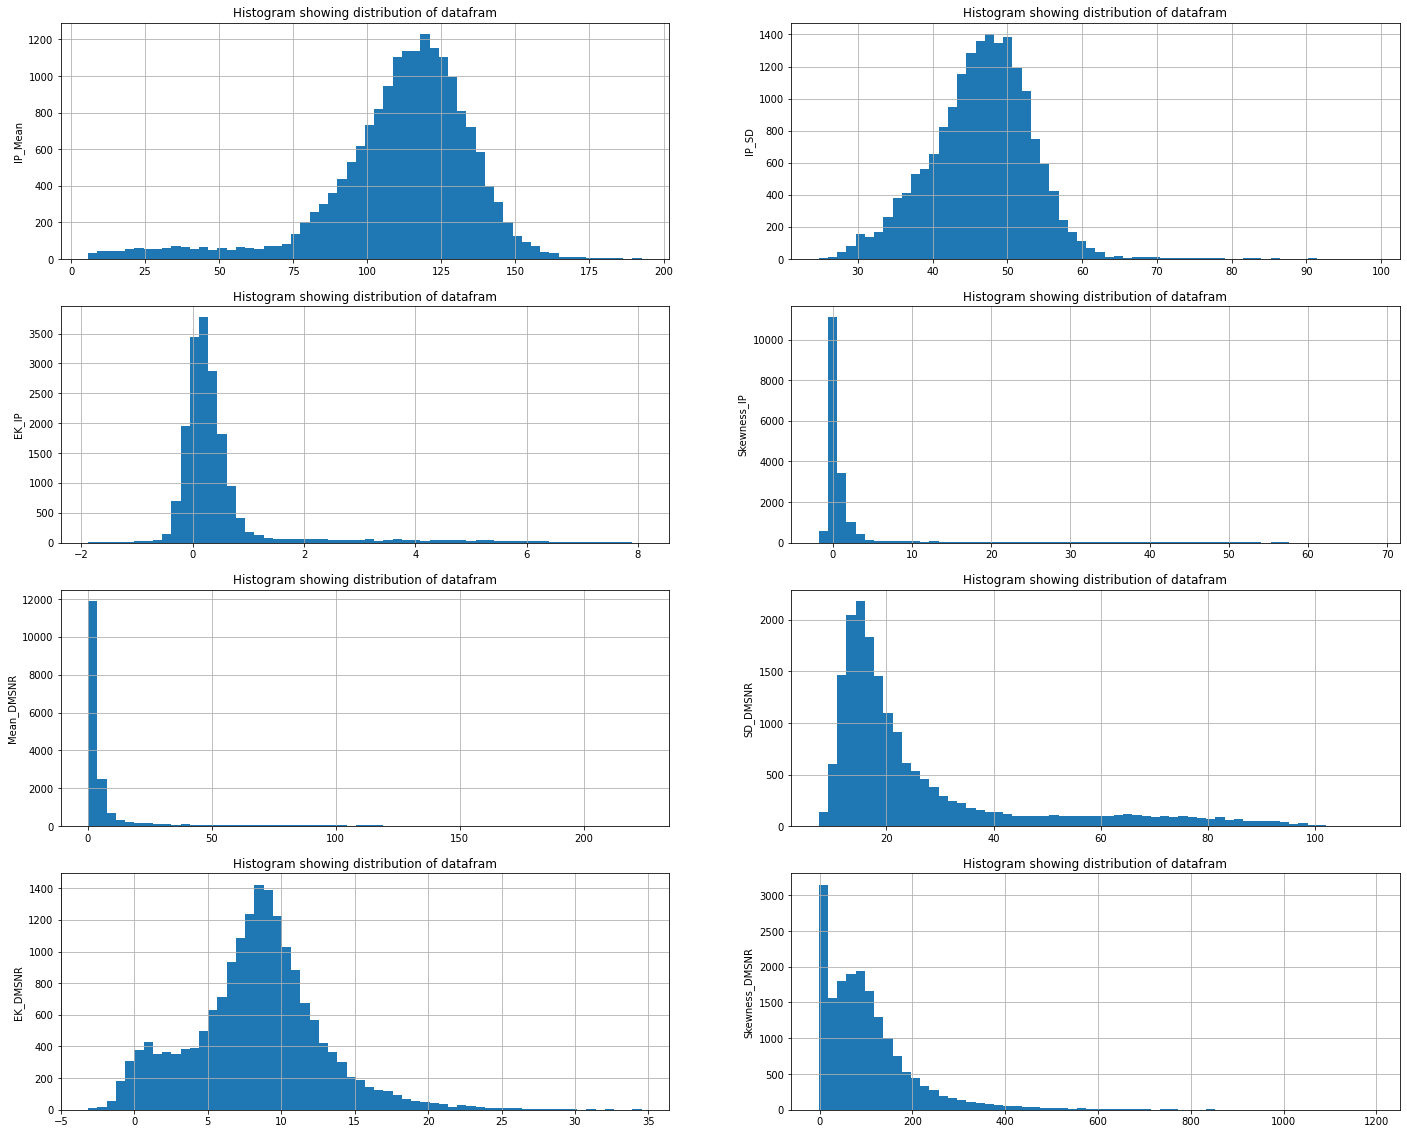

In [242]:
#now find the distributiion to know either the data is skewed or normal

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = dataset['IP_Mean'].hist(bins=60)
fig.set_title("Histogram showing distribution of datafram")
fig.set_ylabel('IP_Mean')

plt.subplot(4, 2, 2)
fig = dataset['IP_SD'].hist(bins=60)
fig.set_title("Histogram showing distribution of datafram")
fig.set_ylabel('IP_SD')

plt.subplot(4, 2, 3)
fig = dataset['EK_IP'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('EK_IP')

plt.subplot(4, 2, 4)
fig = dataset['Skewness_IP'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('Skewness_IP')

plt.subplot(4, 2, 5)
fig = dataset['Mean_DMSNR'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('Mean_DMSNR')

plt.subplot(4, 2, 6)
fig = dataset['SD_DMSNR'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('SD_DMSNR')

plt.subplot(4, 2, 7)
fig = dataset['EK_DMSNR'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('EK_DMSNR')

plt.subplot(4, 2, 8)
fig = dataset['Skewness_DMSNR'].hist(bins=60)
fig.set_title('Histogram showing distribution of datafram')
fig.set_ylabel('Skewness_DMSNR')


We can see that there is skewness in all the distributions

# Distribute into dependent and independent variables and also split into training and testing

In [243]:
#distribute data into dependent and independent variables

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [244]:
#split into training and testing
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
x_train.head(), x_test.head()

(          IP_Mean      IP_SD     EK_IP  Skewness_IP  Mean_DMSNR   SD_DMSNR  \
 3055   120.640625  47.842962  0.257963    -0.090620    8.048495  35.198234   
 10138  116.554688  48.702992  0.197625     0.232600    3.041806  16.610678   
 3600    66.773438  58.206289  1.838734     2.414939   73.643813  80.673494   
 16245   93.312500  34.314663  0.658339     2.928829    3.780936  22.213667   
 6079    99.343750  48.635513  0.470525     0.244099    1.701505  13.167891   
 
         EK_DMSNR  Skewness_DMSNR  
 3055    4.819784       23.528383  
 10138   8.166185       84.846709  
 3600    0.649639       -0.918078  
 16245   7.446869       61.135290  
 6079   11.177091      156.605608  ,
           IP_Mean      IP_SD     EK_IP  Skewness_IP  Mean_DMSNR   SD_DMSNR  \
 5965   102.289062  45.759076  0.231698     0.227156    2.270067  14.343020   
 17707  120.093750  51.765311  0.152885    -0.395776    3.333612  19.674268   
 17795  108.820312  58.015951  0.396479    -0.473085    2.873746  19.4

In [245]:
x_train.describe()

,IP_Mean,IP_SD,EK_IP,Skewness_IP,Mean_DMSNR,SD_DMSNR,EK_DMSNR,Skewness_DMSNR
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,110.858759,46.565693,0.488399,1.818893,12.912853,26.460878,8.273167,104.431502
std,25.940464,6.851364,1.081679,6.286338,29.960088,19.613404,4.514452,106.050504
min,6.179688,24.772042,-1.876011,-1.791886,0.213211,7.370432,-2.812353,-1.976976
25%,100.751953,42.407421,0.028028,-0.185156,1.933110,14.447192,5.726638,34.148027
50%,114.976562,46.966254,0.223053,0.198242,2.809783,18.483441,8.416290,82.595021
75%,127.115234,51.019621,0.477569,0.926502,5.531773,28.576960,10.694074,138.962644
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


# Feature Scalling 

In [246]:
#separate columns and save
cols = x_train.columns

In [247]:
#now lets scale using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

#now transform x_test as well
x_test = scaler.transform(x_test)


In [248]:
#now add datafrom specifically columns

x_train = pd.DataFrame(x_train, columns =[cols])
x_test = pd.DataFrame(x_test, columns = [cols])
x_train.head(), x_test.head()

(    IP_Mean     IP_SD     EK_IP Skewness_IP Mean_DMSNR  SD_DMSNR  EK_DMSNR  \
 0  0.377102  0.186432 -0.213043   -0.303767  -0.162367  0.445494 -0.764988   
 1  0.219585  0.311963 -0.268826   -0.252348  -0.329485 -0.502235 -0.023698   
 2 -1.699540  1.699078  1.248413    0.094819   2.027133  2.764156 -1.688753   
 3 -0.676429 -1.788178  0.157113    0.176569  -0.304813 -0.216554 -0.183040   
 4 -0.443917  0.302114 -0.016524   -0.250519  -0.374223 -0.677774  0.643273   
 
   Skewness_DMSNR  
 0      -0.762900  
 1      -0.184681  
 2      -0.993425  
 3      -0.408275  
 4       0.491991  ,
     IP_Mean     IP_SD     EK_IP Skewness_IP Mean_DMSNR  SD_DMSNR  EK_DMSNR  \
 0 -0.330372 -0.117735 -0.237325   -0.253214  -0.355245 -0.617857  0.271848   
 1  0.356020  0.758944 -0.310189   -0.352311  -0.319745 -0.346031 -0.068928   
 2 -0.078584  1.671296 -0.084982   -0.364609  -0.335094 -0.356476  0.227847   
 3  1.011088  0.699710 -0.447545   -0.311606  -0.374557 -0.761123  0.941501   
 4 -0.68

In [249]:
x_train.describe()

,IP_Mean,IP_SD,EK_IP,Skewness_IP,Mean_DMSNR,SD_DMSNR,EK_DMSNR,Skewness_DMSNR
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


Hence we can see the values are decreased


# SVM with Default parameters

In [250]:
#import SVM classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [251]:
#now find accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9826815642458101

In [252]:
#now lets again train model using rbf and c
svc = SVC(C=100)
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [253]:
#again find accuracy score
accuracy_score(y_test, pred)

0.9832402234636871

Hence we see an improvement in accuracy after using C=100

In [254]:
#lets again train the model using C=1000
svc_classifier = SVC(C=1000)
svc_classifier.fit(x_train, y_train)
y_prediction = svc_classifier.predict(x_test)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [255]:
#now find accuracy
accuracy_score(y_test, y_prediction)

0.9815642458100559

with C=1000 our model's accuracy decreased 

In [256]:
#now use linear kernel and C=1 and train our model

linear_svc = SVC(kernel='linear', C=1)
linear_svc.fit(x_train, y_train)
linear_pred = linear_svc.predict(x_test)

#now find accuracy
accuracy_score(y_test, linear_pred)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9829608938547486

Since accuracy score is again improved

In [257]:
#now again use C=100 with linear kernel and see accuracy score

linear_classifier = SVC(kernel='linear', C=100)
linear_classifier.fit(x_train, y_train)
pred_linear = linear_classifier.predict(x_test)

#now aacuracy score
accuracy_score(y_test, pred_linear)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9832402234636871

accuracy score again improved

In [258]:
#now check for C=1000 with linear kernel

linear_svc = SVC(kernel='linear', C=1000)
linear_svc.fit(x_train, y_train)
svc_pred = linear_svc.predict(x_test)

#now calculate accuracy
accuracy_score(y_test, svc_pred)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9832402234636871

Hence accuracy is maintained

In [260]:
#now lets compare accuracy of train data with the test data which we have already found

y_pred_train = SVC(kernel='linear', C=1)
y_pred_train.fit(x_train, y_train)
pred_y = y_pred_train.predict(x_train)

#now accuracy 
accuracy_score(y_train, pred_y)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9782790892582763

we can see training and testing accuracy are comaprable

In [263]:
#compare the accuracy of training data and testing data

print("Accuracy of the training data is ", accuracy_score(y_train, pred_y))
print("Accuracy of the testing data is ", accuracy_score(y_test, pred_linear))

Accuracy of the training data is  0.9782790892582763
Accuracy of the testing data is  0.9832402234636871


Since the accuracy of testing data is quite higher than the training data. We cannot question about underfitting or overfitting as the accuraies are comparable.

In [264]:
#check distribution in test class

y_test.value_counts()

0    3306
1     274
Name: Target_Class, dtype: int64

The most frequent class is 0 which occured 3306 times

In [266]:
#null accuracy

null_accuracy = 3306/len(y_test)
null_accuracy

0.923463687150838

Since the model's accuracy is higher than null accuracy and we can conclude that our model is performing a good job

# Run SVM with polynomial Kernel

In [270]:
#C=1 and kernel=poly

poly_svc = SVC(kernel='poly', C=1)
poly_svc.fit(x_train, y_train)
pred_poly1 = poly_svc.predict(x_test)

#acuracy

accuracy_score(y_test, pred_poly1)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9807262569832402

model accuracy with C=1 and kernel='poly' is 98.07%

In [272]:
#C=1 and kernel=poly

poly_svc100 = SVC(kernel='poly', C=100)
poly_svc100.fit(x_train, y_train)
pred_poly100 = poly_svc100.predict(x_test)

#accuracy
accuracy_score(y_test, pred_poly100)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9824022346368715

with C=100 and kernel='poly' we got accuracy is 98.24%. we conclude that linear kernel is performing better that poly

# Run SVC with Sigmoid kernel

In [273]:
# with kernel = 'sigmoid' and C=1, find accuracy
sig_svc1 = SVC(kernel='sigmoid', C=1)
sig_svc1.fit(x_train, y_train)
pred_sig1 = sig_svc1.predict(x_test)

#accuracy
accuracy_score(y_test, pred_sig1)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8857541899441341

In [274]:
#with kernel=sigmoid and C=100

sig_svc100 =SVC(kernel='sigmoid', C=100)
sig_svc100.fit(x_train, y_train)
pred_sig100 = sig_svc100.predict(x_test)

#accuracy
accuracy_score(y_test, pred_sig100)

/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8854748603351955

As we can see that sigmoid is also not perforing good compare to linear

# Confusion Matrix

As accuracy is not the best way to compare a model, so we can make confusion matrix